In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../input/fake-news/train.csv')
test = pd.read_csv('../input/fake-news/test.csv')

In [3]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
print(train.shape)
print(test.shape)

(20800, 5)
(5200, 4)


In [5]:
len(train['title'][0])

81

In [6]:
len(train['text'][0])

4930

In [7]:
data = train.append(test)

In [8]:
data.shape

(26000, 5)

In [9]:
data.isna().sum()

id           0
title      680
author    2460
text        46
label     5200
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [12]:
data.shape

(18285, 5)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

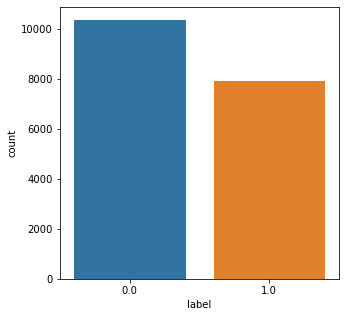

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='label')

There is more negative news than positive news

In [15]:
X = data.drop('label',axis=1)

In [16]:
y = data['label']

In [41]:
import tensorflow 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,LSTM,Dropout
from tensorflow.keras.preprocessing.text import one_hot

In [42]:
messages = X.copy()

In [43]:
messages.reset_index(inplace=True)

In [44]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
lem = WordNetLemmatizer()

In [46]:
corpus = []

for i in range(len(messages)):
    text = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    text = text.lower()
    text = text.split()
    
    text = [lem.lemmatize(word) for word in text if not word in nltk.corpus.stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

In [47]:
corpus[:5]

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery']

In [48]:
word2count = {}

for sentence in corpus:
    words = nltk.word_tokenize(sentence)
    
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [49]:
len(word2count)

17489

In [50]:
import heapq

In [51]:
word_freq = heapq.nlargest(5000,word2count,key=word2count.get)
word_freq

['new',
 'time',
 'york',
 'trump',
 'breitbart',
 'hillary',
 'clinton',
 'u',
 'donald',
 'election',
 'obama',
 'say',
 'state',
 'video',
 'war',
 'russia',
 'president',
 'comment',
 'world',
 'year',
 'american',
 'day',
 'news',
 'email',
 'fbi',
 'attack',
 'america',
 'report',
 'house',
 'white',
 'woman',
 'medium',
 'police',
 'get',
 'campaign',
 'vote',
 'call',
 'bill',
 'first',
 'one',
 'briefing',
 'black',
 'syria',
 'anti',
 'show',
 'right',
 'plan',
 'russian',
 'people',
 'win',
 'democrat',
 'life',
 'watch',
 'may',
 'make',
 'man',
 'go',
 'muslim',
 'back',
 'million',
 'could',
 'china',
 'child',
 'like',
 'putin',
 'n',
 'wikileaks',
 'take',
 'border',
 'voter',
 'republican',
 'case',
 'health',
 'court',
 'breaking',
 'fake',
 'isi',
 'want',
 'law',
 'obamacare',
 'comey',
 'de',
 'government',
 'investigation',
 'leader',
 'evening',
 'big',
 'find',
 'end',
 'official',
 'ban',
 'protest',
 'top',
 'city',
 'claim',
 'f',
 'face',
 'california',
 'is

In [52]:
vocab_size = len(word_freq)

In [53]:
onehot_corpus = []
for sentences in corpus:
    Z = one_hot(sentences,vocab_size)
    onehot_corpus.append(Z)

In [54]:
onehot_corpus

[[4061, 3056, 616, 1071, 1104, 3283, 924, 904, 3276, 2870],
 [394, 1323, 2967, 1335, 4287, 1734, 3280],
 [2085, 995, 4930, 1298],
 [659, 4776, 4503, 3472, 67, 3118],
 [628, 4287, 3523, 1533, 640, 3924, 4287, 2559, 2673, 1072],
 [1243,
  4225,
  103,
  4040,
  4469,
  637,
  706,
  3724,
  1008,
  1166,
  4936,
  3790,
  1840,
  2715,
  3280],
 [2377, 1268, 4018, 4303, 3205, 8, 3946, 4693, 1302, 3182, 1967],
 [4374, 4653, 2447, 1905, 4052, 3136, 637, 1919, 1302, 3182, 1967],
 [2309, 3400, 4900, 2245, 2080, 1417, 4884, 1464, 637, 737],
 [1649, 4490, 221, 570, 4659, 181, 2306, 4829],
 [3160, 1811, 1995, 4717, 4566, 3183, 1134, 185, 3452, 444, 3387],
 [3472, 1967, 1104, 1536, 637, 4052],
 [1398, 3037, 3422, 4530, 3389, 4096, 3491, 1091, 1304],
 [4745, 4800, 4756, 942, 2322, 4448, 3888, 1302, 3182, 1967],
 [1558, 2613, 4230, 328, 3012, 1302, 3182, 1967],
 [4816, 4413, 2220, 4575, 4049, 924, 4844, 4637, 733, 2924],
 [3178, 2733, 1323],
 [2770, 2341, 2292, 1146, 637, 3178, 747, 3280],
 [185, 

In [55]:
length = 20
embedded_sents = pad_sequences(onehot_corpus,padding='pre',maxlen=length)

In [56]:
print(embedded_sents)

[[   0    0    0 ...  904 3276 2870]
 [   0    0    0 ... 4287 1734 3280]
 [   0    0    0 ...  995 4930 1298]
 ...
 [   0    0    0 ... 1302 3182 1967]
 [   0    0    0 ... 4412 4502 2277]
 [   0    0    0 ... 2986 3259 4142]]


In [57]:
embedded_sents[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4061,
       3056,  616, 1071, 1104, 3283,  924,  904, 3276, 2870], dtype=int32)

In [59]:
embedding_feature_vectors = 40
model = Sequential()
model.add(Embedding(vocab_size,embedding_feature_vectors,input_length=length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
import numpy as np

In [62]:
X_final = np.asarray(embedded_sents)
y_final = np.asarray(y)

In [63]:
X_final

array([[   0,    0,    0, ...,  904, 3276, 2870],
       [   0,    0,    0, ..., 4287, 1734, 3280],
       [   0,    0,    0, ...,  995, 4930, 1298],
       ...,
       [   0,    0,    0, ..., 1302, 3182, 1967],
       [   0,    0,    0, ..., 4412, 4502, 2277],
       [   0,    0,    0, ..., 2986, 3259, 4142]], dtype=int32)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.2)

In [66]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=128)

Train on 14628 samples, validate on 3657 samples
Epoch 1/20
14628/14628 [==============================] - 7s 462us/sample - loss: 0.4204 - accuracy: 0.7929 - val_loss: 0.2346 - val_accuracy: 0.8955
Epoch 2/20
14628/14628 [==============================] - 4s 304us/sample - loss: 0.1626 - accuracy: 0.9363 - val_loss: 0.1966 - val_accuracy: 0.9125
Epoch 3/20
14628/14628 [==============================] - 5s 316us/sample - loss: 0.1144 - accuracy: 0.9584 - val_loss: 0.2015 - val_accuracy: 0.9144
Epoch 4/20
14628/14628 [==============================] - 5s 335us/sample - loss: 0.0896 - accuracy: 0.9694 - val_loss: 0.2602 - val_accuracy: 0.9098
Epoch 5/20
14628/14628 [==============================] - 5s 320us/sample - loss: 0.0702 - accuracy: 0.9761 - val_loss: 0.2718 - val_accuracy: 0.9119
Epoch 6/20
14628/14628 [==============================] - 4s 300us/sample - loss: 0.0525 - accuracy: 0.9823 - val_loss: 0.2893 - val_accuracy: 0.9117
Epoch 7/20
14628/14628 [===========================

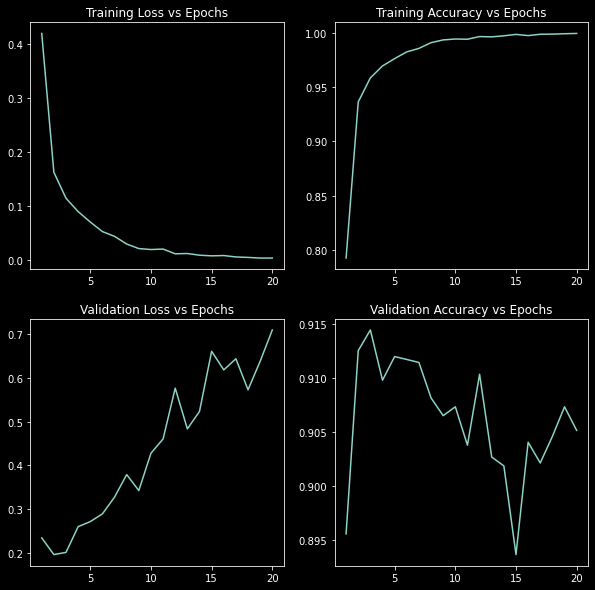

In [69]:
plt.style.use('dark_background')
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 21), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 21), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 21), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 21), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training Accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation Accuracy vs Epochs')
plt.show()

In [70]:
y_pred = model.predict_classes(X_test)

In [71]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix
score = accuracy_score(y_test,y_pred)
print(score)

0.9051134809953514


In [74]:
sm = confusion_matrix(y_test,y_pred)
sm

array([[1902,  202],
       [ 145, 1408]])

In [78]:
df = pd.DataFrame(sm,columns=np.unique(y_test), index = np.unique(y_test))
df

,0.0,1.0
0.0,1902,202
1.0,145,1408


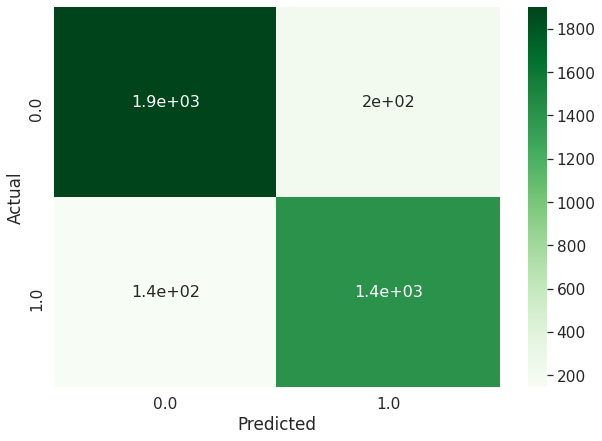

In [92]:
df.index.name = 'Actual'
df.columns.name = 'Predicted'
plt.figure(figsize = (5,5))

sns.set(font_scale=1.4)
sns.heatmap(df, cmap="Greens",annot=True,annot_kws={"size": 16})